In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. Load dataset
data = pd.read_csv("diabetes.csv")

In [3]:
# Replace invalid zeros with median (except Pregnancies and Outcome)
cols_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].median(), inplace=True)

/tmp/ipython-input-363249994.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [4]:
# Features / Target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [5]:
# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# 2. Build model
model = Sequential([
    Dense(16, activation="relu", input_shape=(X.shape[1],)),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 3. Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [9]:
# 4. Train
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5913 - loss: 0.7252 - val_accuracy: 0.5610 - val_loss: 0.7570
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6539 - loss: 0.6784 - val_accuracy: 0.5854 - val_loss: 0.7131
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6904 - loss: 0.6367 - val_accuracy: 0.6179 - val_loss: 0.6811
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6676 - loss: 0.6235 - val_accuracy: 0.6260 - val_loss: 0.6550
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6968 - loss: 0.6011 - val_accuracy: 0.6341 - val_loss: 0.6330
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7166 - loss: 0.5637 - val_accuracy: 0.6504 - val_loss: 0.6133
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6842 - loss: 0.5740 - val_accuracy: 0.6585 - val_loss: 0.5967
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7428 - loss: 0.5334 - val_accuracy: 0.6667 - 

In [10]:
# 5. Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report (TensorFlow):")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report (TensorFlow):
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



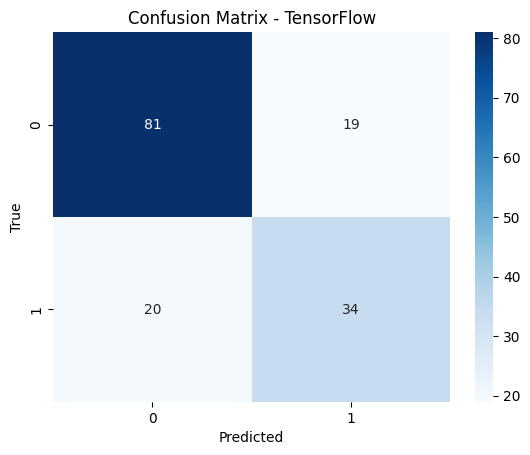

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - TensorFlow")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

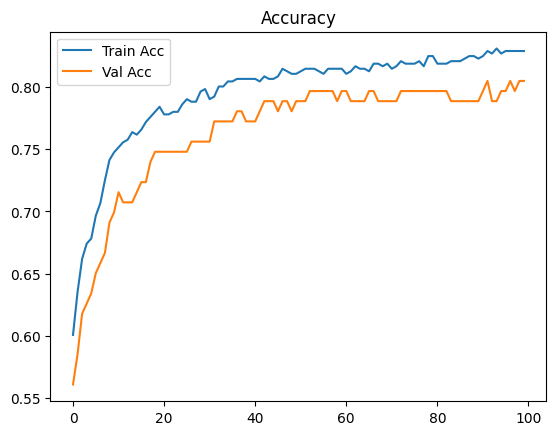

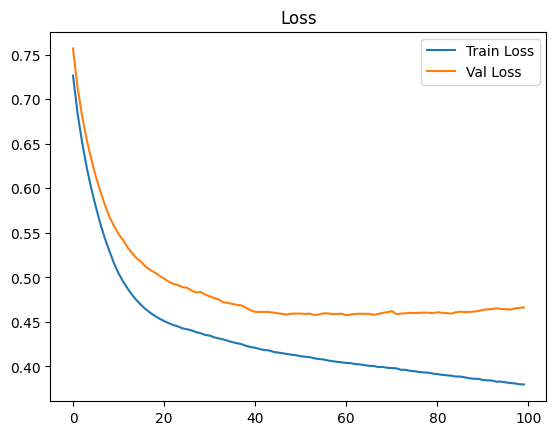

In [12]:
# Plot accuracy/loss
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()
plt.show()